In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from hazm import Normalizer

In [2]:
df = pd.read_csv(r'../data/sales.csv')

df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15428\300903533.py:1: DtypeWarning: Columns (5,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/sales.csv')


,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,address_no_digits,region,latitude,longitude,Gold,facility_count,بخاری,heating,extrahouse,welfare
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,3.0,2,...,ارمغان,11.0,36.347262,59.466991,583900.0,8,1,0,1,2
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3.0,7.0,3.0,2,...,هاشمیه,9.0,36.307539,59.501074,583900.0,12,0,1,3,2
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6.0,4.0,5.0,2,...,حسابی جنوبی,10.0,36.349646,59.495644,583900.0,8,0,0,3,0
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,8.0,3.0,2,...,کوثر شمالی,9.0,36.309638,59.510348,583900.0,10,1,0,3,2
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,2.0,3,...,حسابی شمالی,10.0,36.362017,59.504458,583900.0,17,0,1,3,3


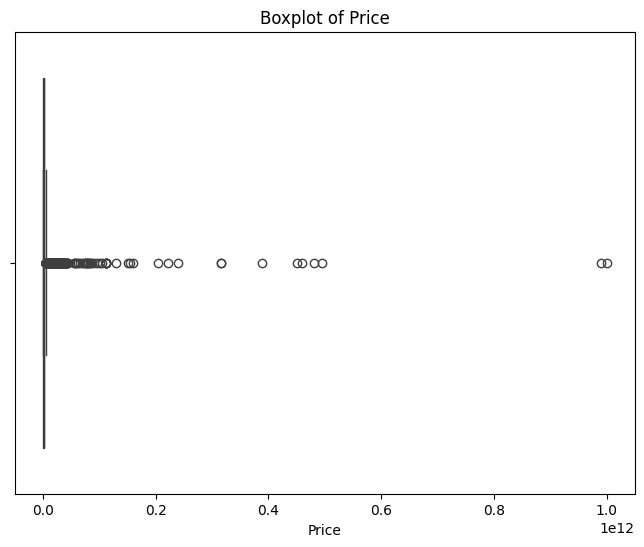

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


In [6]:
df['facilities'] = df['facilities'].str.replace("'", "", regex=False)
df['facility_count'] = df['facilities'].apply(lambda x: len(str(x).split(',')))

from collections import Counter

# Flatten all facilities into a single list
all_facilities = df['facilities'].dropna().str.split(',').sum()
normalizer = Normalizer()

normalized_features = [normalizer.normalize(feature) for feature in all_facilities]
# Count the frequency of each facility
facility_frequency = Counter(normalized_features)

# Convert to a DataFrame for easier visualization
facility_frequency_df = pd.DataFrame(facility_frequency.items(), columns=['Facility', 'Frequency'])

# Sort by frequency (optional)
facility_frequency_df = facility_frequency_df.sort_values(by='Frequency', ascending=False)

In [6]:
normalizer = Normalizer()

# Ensure all entries in 'facilities' are strings and handle missing values
df["facilities"] = df["facilities"].fillna("").astype(str)

# Normalize each facility and split by commas
df["facilities"] = df["facilities"].apply(
    lambda x: ",".join([normalizer.normalize(item.strip()) for item in x.split(",")])
)

# List of facilities for which you want to create columns
selected_facilities = [
    "پارکینگ", "انباری", "پکیج", "آسانسور", "بخاری", 
    "شوفاژ", "تراس", "کمد دیواری", "هود", 
    "گاز روکار", "درب ضدسرقت", "حمام مستر", "گرما از کف"
]

# Add a column for each selected facility
for facility in selected_facilities:
    df[facility] = df["facilities"].apply(lambda x: 1 if facility in x else 0)

In [9]:
df.loc[df['پارکینگ']==1,'parking'] =1
df.loc[df['آسانسور']==1,'elevator'] =1

df['parking'].replace({'دارد':1,'ندارد':0},inplace=True)
df['elevator'].replace({'دارد':1,'ندارد':0},inplace=True)


df['heating'] = 0  
df.loc[(df['شوفاژ'] == 1) | (df['پکیج'] == 1) | (df['گرما از کف'] == 1), 'heating'] = 1

df['extrahouse'] = 0  
df.loc[(df['تراس'] == 1) & (df['انباری'] == 1), 'extrahouse'] = 3
df.loc[(df['تراس'] == 0) & (df['انباری'] == 0), 'extrahouse'] = 0
df.loc[(df['تراس'] == 0) & (df['انباری'] == 1), 'extrahouse'] = 2
df.loc[(df['تراس'] == 1) & (df['انباری'] == 0), 'extrahouse'] = 1


df['welfare'] = df['هود'] + df['کمد دیواری'] + df['حمام مستر'] + df['گاز روکار'] + df['درب ضدسرقت'] 

df.drop([
    "پارکینگ", "انباری", "پکیج", "آسانسور", 
    "شوفاژ", "تراس", "کمد دیواری", "هود", 
    "گاز روکار", "درب ضدسرقت", "حمام مستر", "گرما از کف"
],axis=1,inplace=True)



## fix the price column

In [20]:
df['price'].isna().sum()

42946

In [ ]:
df['parking'].replace({'دارد':1,'ندارد':0},inplace=True)
df['elevator'].replace({'دارد':1,'ندارد':0},inplace=True)

### fit regression to predict missing price

In [5]:
df.isna().sum()

link                       0
type                       0
date                       0
address                    0
area                       0
floors_sum                 0
homes_num                  0
floor_num                  0
rooms                      0
property_direction         0
view                       0
flooring                   0
wall                       0
cabinet                    0
cooler                     0
water                      0
electricity                0
gas                        0
age                        0
elevator                   0
parking                    0
desc                       0
price                  42946
mortgage              133620
rent                  133620
facilities             45308
Dollar                     0
address_no_digits          0
region                     0
latitude               12954
longitude              12954
Gold                    7311
facility_count             0
بخاری                      0
heating       

In [3]:
# cleaner cell
def fillna_mode(group):
    
    mode = group.mode().iloc[0] if not group.mode().empty else None
    # print(mode)
    return group.fillna(mode)

df.dropna(subset=['region'],inplace=True)
df.drop(['infrastructure'],axis=1,inplace=True)

df['age'] = df['age'].fillna(
    df.groupby('region')['age'].transform('mean')
)

df['floors_sum'] = df['floors_sum'].fillna(
    df.groupby('region')['floors_sum'].transform('mean')
)
df['homes_num'] = df['homes_num'].fillna(
    df.groupby('region')['homes_num'].transform('mean')
)
df['floor_num'] = df['floor_num'].fillna(
    df.groupby('region')['floor_num'].transform('mean')
)

df['flooring'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['flooring'] = df.groupby('region')['flooring'].transform(fillna_mode)
df['flooring'] = df['flooring'].apply(lambda x: 1 if x == 'سرامیک' else 0)

df['property_direction'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['property_direction'] = df.groupby('region')['property_direction'].transform(fillna_mode)
df['property_direction'] = df['property_direction'].apply(lambda x: 1 if x == 'جنوبی' else (2 if x == 'شمالی' else 0))

df['cabinet'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['cabinet'] = df.groupby('region')['cabinet'].transform(fillna_mode)
category_map = {
    "ام دی اف": 2,
    "های گلاس": 2,
    "MDF های گلاس": 2,
    "وکیوم": 2,
    "روکش ام دی اف": 2,
    "ملامینه": 2,
    "چوب": 3,
    "طرح چوب": 3,
    "روکش چوب": 3,
    "کلاسیک": 3,
    "فلزی": 1,
    "فلز و ام دی اف": 1,
    "فلز و چوب": 1,
    "های گلاس و فلز": 1,
    "پی وی سی": 2,
    "اچ پی ال": 2,
    "اچ دی اف": 2,
    "نئوکلاسیک": 2,
    "طرح جزیره فایبرگلاس": 2
}
df["cabinet"] = df["cabinet"].map(category_map)


df['cooler'].replace({'کولر آبی':'آبی','کولر گازی':'گازی','آبی و گازی':'اسپلیت','داکت اسپلیت':'اسپلیت','فن کوئل':'اسپلیت','-':np.NAN,"couldn't crawl":np.NAN,'کولر آب':'آبی'},inplace=True)
df['cooler'] = df['cooler'].astype(str)
df['cooler'] = df['cooler'].apply(
    lambda x: 'گازی' if 'کولر گازی' in x else (
        'آبی' if 'کولر آبی' in x else (
            'اسپیلت' if 'اسپیلت' in x else (
            'اسپیلت' if 'اسپلیت' in x else x
        )
        )
    )
)
df['cooler'] = df['cooler'].replace('nan', np.NAN)
df['cooler'] = df.groupby('region')['cooler'].transform(fillna_mode)
df['cooler'] = df['cooler'].apply(lambda x: 1 if x == 'آبی' else (2 if x == 'گازی' else (3 if x == 'اسپیلت' else (0 if x == 'ندارد' else 0))))

df['gas'] = df['gas'].apply(lambda x: 1 if x == 'مستقل' else 0)
df['water'] = df['water'].apply(lambda x: 1 if x == 'مستقل' else 0)
df['electricity'] = df['electricity'].apply(lambda x: 1 if x == 'مستقل' else 0)

df['wall'].replace({'-':np.NAN,"couldn't crawl":np.NAN},inplace=True)
df['wall'] = df.groupby('region')['wall'].transform(fillna_mode)
df['wall'] = df['wall'].apply(lambda x: 1 if x == 'نقاشی' else (2 if x == 'کاغذ دیواری' else 0))

df['desc'].replace({'-':np.NAN,"couldn't crawl":np.NAN,'سایر':np.NAN},inplace=True)
df['desc'] = df['desc'].astype(str)
normalizer = Normalizer()
df['desc'] = df['desc'].apply(lambda x: normalizer.normalize(x))
df['desc'] = df['desc'].astype(str)
df['desc'] = df['desc'].apply(
    lambda x: 'سند' if 'دانگ' in x else (
        'قول‌نامه‌ای' if 'قول‌نامه‌' in x else (
            'سند' if 'آستانه' in x else (
            'سند' if 'منگوله‌دار' in x  else (
            'قول‌نامه‌ای' if 'قولنامه' in x else (
            'قول‌نامه‌ای' if 'وکالتی' in x else (
            'سند' if 'تک‌برگ' in x else (
            'سند' if 'ملک' in x else x
        )
        )
        )
        )
        )
        )
    )
)
df['desc'] = df.groupby('region')['desc'].transform(fillna_mode)
df['desc'] = df['desc'].apply(lambda x: 1 if x == 'قول‌نامه‌' else (2 if x == 'سند' else 0))


df.loc[df['price']<100000000,'price'] = np.NAN


In [4]:
# 2-find the most realted features to fill the missing values
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,area,floors_sum,homes_num,floor_num,rooms,property_direction,flooring,wall,cabinet,cooler,water,electricity,gas,age,elevator,parking,desc,price,Dollar,region,latitude,longitude,Gold,facility_count,بخاری,heating,extrahouse,welfare
area,1.000000,0.213579,-0.011080,0.120938,0.548691,0.028109,0.000024,0.045026,0.233891,0.229727,0.045730,0.031421,0.000887,-0.169978,0.287444,0.248985,0.213710,0.150961,-0.038449,-0.012356,-0.006938,0.002137,-0.036731,0.204336,-0.240240,0.275559,0.164860,0.129770
floors_sum,0.213579,1.000000,0.438265,0.471263,0.301796,0.013954,0.063740,-0.019317,0.271138,0.265868,0.036478,0.037235,0.015790,-0.407880,0.540665,0.270327,0.183322,0.073608,-0.057538,0.078985,0.012665,0.002784,-0.047073,0.302215,-0.266898,0.380291,0.235411,0.188811
homes_num,-0.011080,0.438265,1.000000,0.153741,0.068635,-0.010394,-0.012706,-0.094630,0.068538,0.090412,0.016931,0.026964,0.002493,-0.111843,0.284876,0.247471,0.281542,-0.040861,-0.156017,0.249794,0.037871,-0.006181,-0.139920,0.301787,-0.040892,0.272534,0.241986,0.132303
floor_num,0.120938,0.471263,0.153741,1.000000,0.198519,-0.013156,0.038382,0.030607,0.122207,0.095061,0.042444,0.029430,0.021535,-0.182638,0.252916,0.172195,0.076219,0.043341,0.020632,0.035439,0.006871,0.001476,0.022662,0.113347,-0.145843,0.137372,0.115528,0.077551
rooms,0.548691,0.301796,0.068635,0.198519,1.000000,0.047548,0.017701,0.084696,0.297875,0.254520,0.111222,0.072668,0.029870,-0.180623,0.381763,0.414405,0.346871,0.158245,-0.033410,0.078394,-0.005700,-0.008314,-0.027253,0.291898,-0.297555,0.349489,0.255549,0.189797
property_direction,0.028109,0.013954,-0.010394,-0.013156,0.047548,1.000000,0.001908,0.017158,0.050696,0.037448,0.018532,0.010533,0.020457,-0.009282,0.003344,0.047345,0.053312,0.009023,0.027797,-0.027168,-0.002585,0.002578,0.030897,0.037071,0.019353,0.018081,0.038650,0.030367
flooring,0.000024,0.063740,-0.012706,0.038382,0.017701,0.001908,1.000000,0.006030,0.126717,0.020932,0.023755,0.010069,0.043290,-0.202253,0.102443,-0.018674,-0.091335,-0.004301,0.007576,-0.006850,0.005950,0.004320,0.008997,0.010810,-0.069735,0.058351,0.004391,0.014254
wall,0.045026,-0.019317,-0.094630,0.030607,0.084696,0.017158,0.006030,1.000000,0.116870,0.081286,0.088263,0.038536,0.060070,-0.008846,0.072607,0.057124,0.000116,0.071517,0.188874,-0.006552,0.008649,0.006703,0.166488,-0.098711,-0.194917,-0.037837,-0.108479,0.050440
cabinet,0.233891,0.271138,0.068538,0.122207,0.297875,0.050696,0.126717,0.116870,1.000000,0.236057,0.093002,0.044644,0.058817,-0.362488,0.325272,0.151349,0.121841,0.106898,0.074035,0.045931,0.006982,0.002819,0.072195,0.259529,-0.316589,0.342366,0.188138,0.267251
cooler,0.229727,0.265868,0.090412,0.095061,0.254520,0.037448,0.020932,0.081286,0.236057,1.000000,0.052822,0.026737,0.027962,-0.277700,0.335260,0.142681,0.121325,0.085919,0.014509,-0.024351,0.006748,0.011569,0.014845,0.127072,-0.266168,0.263316,0.082906,0.097326


In [4]:
hf = pd.concat([df.iloc[:, 0:23], df['region'],df['Dollar'],df.iloc[:, 31:]], axis=1).drop(['link','type','date', 'address','view'],axis=1)
hf['Dollar'] = np.log10(hf['Dollar'])
hf['Gold'] = np.log10(hf['Gold'])
hf['price'] = np.log10(hf['price'])

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm  

data_with_price = hf[hf['price'].notna()]
data_missing_price = hf[hf['price'].isna()]

# Split into features and target
X = data_with_price.drop(columns=['price'])
y = data_with_price['price']

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward Elimination
model = RandomForestRegressor(random_state=42)

# Track performance metrics
r2_scores = []
mses = []
dropped_features = []

# Train the model with all features first
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
initial_r2 = r2_score(y_test, y_pred)
initial_mse = mean_squared_error(y_test, y_pred)

print(f"Initial R² score: {initial_r2:.4f}, Initial MSE: {initial_mse:.4f}\n")

# Iteratively drop features based on importance
features = X_train.columns.tolist()

# Use tqdm to show progress bar for feature elimination
with tqdm(total=len(features)-1, desc="Feature Elimination Progress") as pbar:
    while len(features) > 1:
        # Train model and get feature importances
        model.fit(X_train[features], y_train)
        importances = model.feature_importances_

        # Find the least important feature
        least_important_idx = np.argmin(importances)
        feature_to_drop = features[least_important_idx]

        # Drop the feature
        features.remove(feature_to_drop)

        # Retrain model and evaluate
        model.fit(X_train[features], y_train)
        y_pred = model.predict(X_test[features])
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Store the metrics
        dropped_features.append(feature_to_drop)
        r2_scores.append(r2)
        mses.append(mse)

        # Print current results
        print(f"After dropping feature: '{feature_to_drop}'")
        print(f"R² score: {r2:.4f}, MSE: {mse:.4f}\n")

        # Update the progress bar
        pbar.update(1)

# Summary
print("Feature elimination complete!")
print("Dropped Features in Order:")
for i, feature in enumerate(dropped_features):
    print(f"{i+1}. {feature} - R²: {r2_scores[i]:.4f}, MSE: {mses[i]:.4f}")


Initial R² score: 0.9027, Initial MSE: 0.0133



Feature Elimination Progress:   4%|▍         | 1/24 [02:43<1:02:42, 163.58s/it]

After dropping feature: 'electricity'
R² score: 0.9026, MSE: 0.0133



Feature Elimination Progress:   8%|▊         | 2/24 [05:28<1:00:19, 164.52s/it]

After dropping feature: 'gas'
R² score: 0.9027, MSE: 0.0133



Feature Elimination Progress:  12%|█▎        | 3/24 [08:16<58:09, 166.19s/it]  

After dropping feature: 'water'
R² score: 0.9026, MSE: 0.0133



Feature Elimination Progress:  17%|█▋        | 4/24 [11:02<55:20, 166.01s/it]

After dropping feature: 'flooring'
R² score: 0.9026, MSE: 0.0133



Feature Elimination Progress:  21%|██        | 5/24 [13:38<51:21, 162.19s/it]

After dropping feature: 'welfare'
R² score: 0.9025, MSE: 0.0133



Feature Elimination Progress:  25%|██▌       | 6/24 [16:15<48:12, 160.68s/it]

After dropping feature: 'wall'
R² score: 0.9022, MSE: 0.0134



Feature Elimination Progress:  29%|██▉       | 7/24 [18:47<44:41, 157.73s/it]

After dropping feature: 'extrahouse'
R² score: 0.9020, MSE: 0.0134



Feature Elimination Progress:  33%|███▎      | 8/24 [21:16<41:17, 154.86s/it]

After dropping feature: 'heating'
R² score: 0.9018, MSE: 0.0134



Feature Elimination Progress:  38%|███▊      | 9/24 [23:32<37:17, 149.18s/it]

After dropping feature: 'property_direction'
R² score: 0.9011, MSE: 0.0135



Feature Elimination Progress:  42%|████▏     | 10/24 [25:45<33:38, 144.16s/it]

After dropping feature: 'cooler'
R² score: 0.9002, MSE: 0.0137



Feature Elimination Progress:  46%|████▌     | 11/24 [27:43<29:28, 136.03s/it]

After dropping feature: 'cabinet'
R² score: 0.9000, MSE: 0.0137



Feature Elimination Progress:  50%|█████     | 12/24 [29:38<25:55, 129.62s/it]

After dropping feature: 'بخاری'
R² score: 0.8991, MSE: 0.0138



Feature Elimination Progress:  54%|█████▍    | 13/24 [31:30<22:48, 124.40s/it]

After dropping feature: 'elevator'
R² score: 0.8963, MSE: 0.0142



Feature Elimination Progress:  58%|█████▊    | 14/24 [33:22<20:05, 120.56s/it]

After dropping feature: 'floor_num'
R² score: 0.8922, MSE: 0.0147



Feature Elimination Progress:  62%|██████▎   | 15/24 [35:06<17:20, 115.67s/it]

After dropping feature: 'facility_count'
R² score: 0.8898, MSE: 0.0151



Feature Elimination Progress:  67%|██████▋   | 16/24 [36:40<14:32, 109.06s/it]

After dropping feature: 'floors_sum'
R² score: 0.8845, MSE: 0.0158



Feature Elimination Progress:  71%|███████   | 17/24 [39:30<14:52, 127.45s/it]

After dropping feature: 'homes_num'
R² score: 0.8743, MSE: 0.0172



Feature Elimination Progress:  75%|███████▌  | 18/24 [42:06<13:35, 135.94s/it]

After dropping feature: 'age'
R² score: 0.8553, MSE: 0.0198



Feature Elimination Progress:  79%|███████▉  | 19/24 [43:42<10:19, 123.99s/it]

After dropping feature: 'parking'
R² score: 0.8477, MSE: 0.0208



Feature Elimination Progress:  83%|████████▎ | 20/24 [44:53<07:12, 108.16s/it]

After dropping feature: 'region'
R² score: 0.8099, MSE: 0.0260



Feature Elimination Progress:  88%|████████▊ | 21/24 [45:56<04:43, 94.45s/it] 

After dropping feature: 'desc'
R² score: 0.7565, MSE: 0.0333



Feature Elimination Progress:  92%|█████████▏| 22/24 [46:36<02:36, 78.16s/it]

After dropping feature: 'area'
R² score: 0.7010, MSE: 0.0409



Feature Elimination Progress:  96%|█████████▌| 23/24 [46:56<01:00, 60.86s/it]

After dropping feature: 'Gold'
R² score: 0.7012, MSE: 0.0409



Feature Elimination Progress: 100%|██████████| 24/24 [47:14<00:00, 118.12s/it]

After dropping feature: 'rooms'
R² score: 0.4287, MSE: 0.0782

Feature elimination complete!
Dropped Features in Order:
1. electricity - R²: 0.9026, MSE: 0.0133
2. gas - R²: 0.9027, MSE: 0.0133
3. water - R²: 0.9026, MSE: 0.0133
4. flooring - R²: 0.9026, MSE: 0.0133
5. welfare - R²: 0.9025, MSE: 0.0133
6. wall - R²: 0.9022, MSE: 0.0134
7. extrahouse - R²: 0.9020, MSE: 0.0134
8. heating - R²: 0.9018, MSE: 0.0134
9. property_direction - R²: 0.9011, MSE: 0.0135
10. cooler - R²: 0.9002, MSE: 0.0137
11. cabinet - R²: 0.9000, MSE: 0.0137
12. بخاری - R²: 0.8991, MSE: 0.0138
13. elevator - R²: 0.8963, MSE: 0.0142
14. floor_num - R²: 0.8922, MSE: 0.0147
15. facility_count - R²: 0.8898, MSE: 0.0151
16. floors_sum - R²: 0.8845, MSE: 0.0158
17. homes_num - R²: 0.8743, MSE: 0.0172
18. age - R²: 0.8553, MSE: 0.0198
19. parking - R²: 0.8477, MSE: 0.0208
20. region - R²: 0.8099, MSE: 0.0260
21. desc - R²: 0.7565, MSE: 0.0333
22. area - R²: 0.7010, MSE: 0.0409
23. Gold - R²: 0.7012, MSE: 0.0409
24. roo

In [5]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
import numpy as np

data_with_price = hf[hf['price'].notna()]
data_missing_price = hf[hf['price'].isna()]

# Split into features and target
X = data_with_price.drop(columns=['price'])
y = data_with_price['price']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM Regressor
model = lgb.LGBMRegressor(random_state=42)

# Track performance metrics
r2_scores = []
mses = []
dropped_features = []

# Train the model with all features first
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
initial_r2 = r2_score(y_test, y_pred)
initial_mse = mean_squared_error(y_test, y_pred)

print(f"Initial R² score: {initial_r2:.4f}, Initial MSE: {initial_mse:.4f}\n")

# Iteratively drop features based on importance
features = X_train.columns.tolist()

# Use tqdm to show progress bar for feature elimination
with tqdm(total=len(features) - 1, desc="Feature Elimination Progress") as pbar:
    while len(features) > 1:
        # Train model and get feature importances
        model.fit(X_train[features], y_train)
        importances = model.feature_importances_

        # Find the least important feature
        least_important_idx = np.argmin(importances)
        feature_to_drop = features[least_important_idx]

        # Drop the feature
        features.remove(feature_to_drop)

        # Retrain model and evaluate
        model.fit(X_train[features], y_train)
        y_pred = model.predict(X_test[features])
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Store the metrics
        dropped_features.append(feature_to_drop)
        r2_scores.append(r2)
        mses.append(mse)

        # Print current results
        print(f"After dropping feature: '{feature_to_drop}'")
        print(f"R² score: {r2:.4f}, MSE: {mse:.4f}\n")

        # Update the progress bar
        pbar.update(1)

# Summary
print("Feature elimination complete!")
print("Dropped Features in Order:")
for i, feature in enumerate(dropped_features):
    print(f"{i + 1}. {feature} - R²: {r2_scores[i]:.4f}, MSE: {mses[i]:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 25
[LightGBM] [Info] Start training from score 9.185350
Initial R² score: 0.8966, Initial MSE: 0.0142



Feature Elimination Progress:   0%|          | 0/24 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 25
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 24
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:   4%|▍         | 1/24 [00:01<00:38,  1.69s/it]

After dropping feature: 'property_direction'
R² score: 0.8962, MSE: 0.0142

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 24
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 23
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:   8%|▊         | 2/24 [00:03<00:33,  1.55s/it]

After dropping feature: 'gas'
R² score: 0.8962, MSE: 0.0142

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 23
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 22
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  12%|█▎        | 3/24 [00:04<00:30,  1.47s/it]

After dropping feature: 'electricity'
R² score: 0.8961, MSE: 0.0142

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 22
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 21
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  17%|█▋        | 4/24 [00:05<00:28,  1.42s/it]

After dropping feature: 'extrahouse'
R² score: 0.8964, MSE: 0.0142

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 21
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 20
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  21%|██        | 5/24 [00:07<00:26,  1.37s/it]

After dropping feature: 'flooring'
R² score: 0.8963, MSE: 0.0142

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 20
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 19
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  25%|██▌       | 6/24 [00:08<00:23,  1.32s/it]

After dropping feature: 'water'
R² score: 0.8963, MSE: 0.0142

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 19
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 18
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  29%|██▉       | 7/24 [00:09<00:21,  1.28s/it]

After dropping feature: 'heating'
R² score: 0.8963, MSE: 0.0142

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 18
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 17
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  33%|███▎      | 8/24 [00:10<00:20,  1.28s/it]

After dropping feature: 'welfare'
R² score: 0.8958, MSE: 0.0143

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 17
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 16
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  38%|███▊      | 9/24 [00:12<00:18,  1.26s/it]

After dropping feature: 'wall'
R² score: 0.8957, MSE: 0.0143

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 16
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 15
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  42%|████▏     | 10/24 [00:13<00:17,  1.24s/it]

After dropping feature: 'بخاری'
R² score: 0.8948, MSE: 0.0144

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 15
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 14
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  46%|████▌     | 11/24 [00:14<00:15,  1.21s/it]

After dropping feature: 'parking'
R² score: 0.8930, MSE: 0.0146

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 14
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 13
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  50%|█████     | 12/24 [00:15<00:14,  1.20s/it]

After dropping feature: 'cooler'
R² score: 0.8928, MSE: 0.0147

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 13
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 12
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  54%|█████▍    | 13/24 [00:16<00:12,  1.16s/it]

After dropping feature: 'cabinet'
R² score: 0.8921, MSE: 0.0148

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 12
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 11
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  58%|█████▊    | 14/24 [00:17<00:11,  1.12s/it]

After dropping feature: 'elevator'
R² score: 0.8869, MSE: 0.0155

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 11
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 10
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  62%|██████▎   | 15/24 [00:18<00:09,  1.08s/it]

After dropping feature: 'floor_num'
R² score: 0.8844, MSE: 0.0158

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 10
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 9
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  67%|██████▋   | 16/24 [00:19<00:08,  1.03s/it]

After dropping feature: 'desc'
R² score: 0.8625, MSE: 0.0188

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 9
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 8
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  71%|███████   | 17/24 [00:20<00:06,  1.01it/s]

After dropping feature: 'Dollar'
R² score: 0.8607, MSE: 0.0191

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 8
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 7
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  75%|███████▌  | 18/24 [00:21<00:05,  1.06it/s]

After dropping feature: 'homes_num'
R² score: 0.8582, MSE: 0.0194

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 7
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 6
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  79%|███████▉  | 19/24 [00:22<00:04,  1.12it/s]

After dropping feature: 'facility_count'
R² score: 0.8456, MSE: 0.0211

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 6
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 5
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  83%|████████▎ | 20/24 [00:22<00:03,  1.19it/s]

After dropping feature: 'floors_sum'
R² score: 0.8367, MSE: 0.0224

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 5
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 4
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  88%|████████▊ | 21/24 [00:23<00:02,  1.27it/s]

After dropping feature: 'age'
R² score: 0.8246, MSE: 0.0240

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 4
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 3
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  92%|█████████▏| 22/24 [00:24<00:01,  1.34it/s]

After dropping feature: 'rooms'
R² score: 0.7559, MSE: 0.0334

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 3
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 2
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress:  96%|█████████▌| 23/24 [00:24<00:00,  1.41it/s]

After dropping feature: 'Gold'
R² score: 0.3957, MSE: 0.0827

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 2
[LightGBM] [Info] Start training from score 9.185350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 113009, number of used features: 1
[LightGBM] [Info] Start training from score 9.185350


Feature Elimination Progress: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]

After dropping feature: 'region'
R² score: 0.3667, MSE: 0.0867

Feature elimination complete!
Dropped Features in Order:
1. property_direction - R²: 0.8962, MSE: 0.0142
2. gas - R²: 0.8962, MSE: 0.0142
3. electricity - R²: 0.8961, MSE: 0.0142
4. extrahouse - R²: 0.8964, MSE: 0.0142
5. flooring - R²: 0.8963, MSE: 0.0142
6. water - R²: 0.8963, MSE: 0.0142
7. heating - R²: 0.8963, MSE: 0.0142
8. welfare - R²: 0.8958, MSE: 0.0143
9. wall - R²: 0.8957, MSE: 0.0143
10. بخاری - R²: 0.8948, MSE: 0.0144
11. parking - R²: 0.8930, MSE: 0.0146
12. cooler - R²: 0.8928, MSE: 0.0147
13. cabinet - R²: 0.8921, MSE: 0.0148
14. elevator - R²: 0.8869, MSE: 0.0155
15. floor_num - R²: 0.8844, MSE: 0.0158
16. desc - R²: 0.8625, MSE: 0.0188
17. Dollar - R²: 0.8607, MSE: 0.0191
18. homes_num - R²: 0.8582, MSE: 0.0194
19. facility_count - R²: 0.8456, MSE: 0.0211
20. floors_sum - R²: 0.8367, MSE: 0.0224
21. age - R²: 0.8246, MSE: 0.0240
22. rooms - R²: 0.7559, MSE: 0.0334
23. Gold - R²: 0.3957, MSE: 0.0827
24. r

In [13]:
selected_features = ['age','parking', 'region', 'desc', 'area', 'Gold', 'rooms']

X = data_with_price[selected_features]
y = data_with_price['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")


R² Score: 0.8698
MSE: 0.0178


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LightGBM R² Score: 0.8843
LightGBM MSE: 0.0158


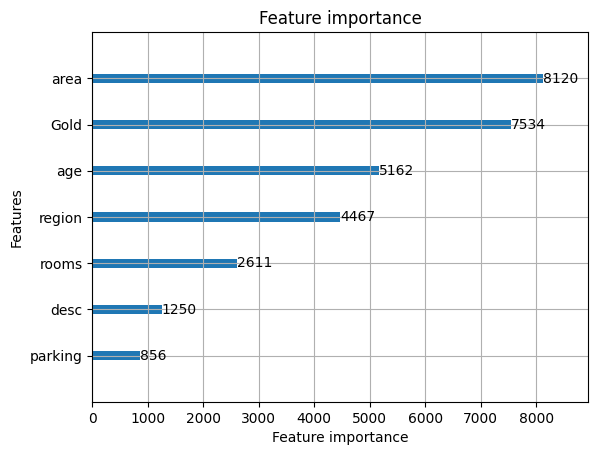

In [18]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

selected_features = ['age','parking', 'region', 'desc', 'area', 'Gold', 'rooms']

X = data_with_price[selected_features]
y = data_with_price['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define LightGBM parameters
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "n_estimators": 1000,
    "min_child_samples": 20,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbosity": -1,
    "random_state": 42,
}

# Train the model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],

)

y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"LightGBM R² Score: {r2:.4f}")
print(f"LightGBM MSE: {mse:.4f}")

# Feature importance (optional)
import matplotlib.pyplot as plt
lgb.plot_importance(model, max_num_features=10)
plt.show()


In [22]:
X_nan = data_missing_price[selected_features]  # Replace `selected_features` with your actual list of features

# Make predictions (output is in log scale, so apply inverse transformation)
predicted_log_price = model.predict(X_nan)
predicted_price = np.power(10, predicted_log_price)  # Convert back to the original scale

# # Fill the missing values in the original DataFrame
# df.loc[df['price'].isna(), 'price'] = predicted_price

In [24]:
df.loc[df['price'].isna(), 'price'] = predicted_price

In [27]:
df.to_csv('fill_price.csv',index=False,encoding='utf-8-sig')